<a href="https://colab.research.google.com/github/blaw5/dlwpt-code/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 - RGB Color Recognition

In [185]:
import torch 
import cv2
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np 

In [186]:
from PIL import Image
img1 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/red1.png")
img2 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/red2.png")
img3 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/red3.png")
img4 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/green1.png")
img5 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/green2.png")
img6 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/green3.png")
img7 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/blue1.png")
img8 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/blue2.png")
img9 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/blue3.png")

In [187]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [188]:
img_t1 = preprocess(img1) #shape of ([3, 224, 224])
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)
img_t4 = preprocess(img4)
img_t5 = preprocess(img5)
img_t6 = preprocess(img6)
img_t7 = preprocess(img7)
img_t8 = preprocess(img8)
img_t9 = preprocess(img9)


In [189]:
#Mean overall (brightness estimate)
print(torch.mean(img_t1))
print(torch.mean(img_t2))
print(torch.mean(img_t3))
print(torch.mean(img_t4))
print(torch.mean(img_t5))
print(torch.mean(img_t6))
print(torch.mean(img_t7))
print(torch.mean(img_t8))
print(torch.mean(img_t9))

tensor(-0.0472)
tensor(-0.2833)
tensor(-0.0377)
tensor(-0.2380)
tensor(0.2939)
tensor(0.2476)
tensor(0.2339)
tensor(0.7462)
tensor(-0.8430)


In [190]:
#Red Images
print(img_t1[0,:,:].mean()) #R channel Image 1
print(img_t1[1,:,:].mean()) #G channel
print(img_t1[2,:,:].mean()) #B channel
print(img_t2[0,:,:].mean()) #R channel Image 2
print(img_t2[1,:,:].mean()) #G channel
print(img_t2[2,:,:].mean()) #B channel
print(img_t3[0,:,:].mean()) #R channel Image 3
print(img_t3[1,:,:].mean()) #G channel
print(img_t3[2,:,:].mean()) #B channel

tensor(0.1693)
tensor(-0.2792)
tensor(-0.0316)
tensor(0.2397)
tensor(-0.6370)
tensor(-0.4528)
tensor(0.8905)
tensor(-0.5273)
tensor(-0.4763)


In [191]:
#Green Images
print(img_t4[0,:,:].mean()) #R channel Image 4
print(img_t4[1,:,:].mean()) #G channel
print(img_t4[2,:,:].mean()) #B channel
print(img_t5[0,:,:].mean()) #R channel Image 5
print(img_t5[1,:,:].mean()) #G channel
print(img_t5[2,:,:].mean()) #B channel
print(img_t6[0,:,:].mean()) #R channel Image 6
print(img_t6[1,:,:].mean()) #G channel
print(img_t6[2,:,:].mean()) #B channel

tensor(-1.2160)
tensor(0.3013)
tensor(0.2006)
tensor(-0.4908)
tensor(1.1099)
tensor(0.2625)
tensor(-0.8345)
tensor(0.7634)
tensor(0.8139)


In [192]:
#Blue Images
print(img_t7[0,:,:].mean()) #R channel Image 7
print(img_t7[1,:,:].mean()) #G channel
print(img_t7[2,:,:].mean()) #B channel
print(img_t8[0,:,:].mean()) #R channel Image 8
print(img_t8[1,:,:].mean()) #G channel
print(img_t8[2,:,:].mean()) #B channel
print(img_t9[0,:,:].mean()) #R channel Image 9
print(img_t9[1,:,:].mean()) #G channel
print(img_t9[2,:,:].mean()) #B channel

tensor(0.1705)
tensor(0.1987)
tensor(0.3325)
tensor(0.5827)
tensor(0.7237)
tensor(0.9322)
tensor(-1.2483)
tensor(-1.0006)
tensor(-0.2801)


Question 2 - Temperature Predicting

In [194]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [195]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

In [196]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [197]:
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [198]:
def model_dw1(t_u, w2, w1, b):
  return w1 #partial derivative in respect to W

In [199]:
def model_dw2(t_u, w2, w1, b):
  return 2 * w2 * t_u #partial derivative in respect to W

In [200]:
def model_db(t_u, w2, w1, b):
  return 1.0 #partial derivative in respect to b

In [201]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw2 = dloss_dtp * model_dw2(t_u, w2, w1, b)
  dloss_dw1 = dloss_dtp * model_dw1(t_u, w2, w1, b)
  dloss_db = dloss_dtp * model_db(t_u, w2, w1, b)
  return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [202]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w2, w1, b = params

    t_p = model(t_u, w2, w1, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w2, w1, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [203]:
t_un = 0.1 * t_u

In [204]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.1,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [205]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.01,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [206]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.001,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss 8.207376
Epoch 1000, Loss 5.957879
Epoch 1500, Loss 4.793697
Epoch 2000, Loss 4.094471
Epoch 2500, Loss 3.641978
Epoch 3000, Loss 3.337545
Epoch 3500, Loss 3.128551
Epoch 4000, Loss 2.983709
Epoch 4500, Loss 2.883058
Epoch 5000, Loss 2.813279


tensor([ 0.4940,  0.0187, -3.9748])

In [207]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.0001,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss 12.978827
Epoch 1000, Loss 12.147491
Epoch 1500, Loss 11.419821
Epoch 2000, Loss 10.779087
Epoch 2500, Loss 10.211207
Epoch 3000, Loss 9.704861
Epoch 3500, Loss 9.250857
Epoch 4000, Loss 8.841681
Epoch 4500, Loss 8.471140
Epoch 5000, Loss 8.134112


tensor([ 0.3440,  0.3917, -0.9371])

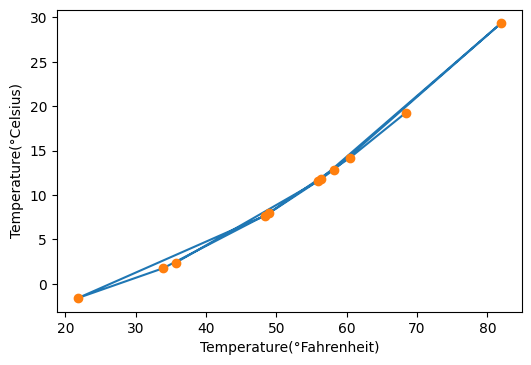

In [163]:
import matplotlib.pyplot as plt 
t_p = model(t_un, *params)
t_pm = 0.4940 * t_un **2 + 0.0187 * t_un - 3.9748

fig = plt.figure(dpi = 100)
plt.xlabel("Temperature(°Fahrenheit)")
plt.ylabel("Temperature(°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_pm.numpy(), 'o')

Question 3 - Housing Price Prediction

In [164]:
import numpy as np 
import pandas as pd 
import torch
import torchvision
import torch.optim as optim
# Data Visualisation 
import matplotlib.pyplot as plt 

In [ ]:
housing = pd.DataFrame(pd.read_csv
                  ("../content/drive/MyDrive/ColabNotebooks/data/Housing.csv")) 
housing.head() 

In [166]:
vars = (np.asarray(housing['area']), np.asarray(housing['bedrooms']),
        np.asarray(housing['bathrooms']),np.asarray(housing['stories'])
        ,np.asarray(housing['parking'])) #standardize inputs
var_s = (vars - np.mean(vars))/np.std(vars)
x1 = torch.from_numpy(var_s[0])
x2 = torch.from_numpy(var_s[1])
x3 = torch.from_numpy(var_s[2])
x4 = torch.from_numpy(var_s[3])
x5 = torch.from_numpy(var_s[4])

In [167]:
norm1 = np.asarray(housing['price'])
#standardize outputs
a = np.mean(norm1)
b = np.std(norm1)
norm_1 = ((norm1-a)/b)


tc = torch.from_numpy(norm_1)

In [168]:
def modelHousing(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B
def ddw1(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return X1
def ddw2(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return X2
def ddw3(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return X3
def ddw4(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return X4
def ddw5(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return X5
def ddb(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  return 1.0

In [169]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

In [170]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [171]:
def grad_fn(t_c, t_p, X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * ddw1(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  dloss_dw2 = dloss_dtp * ddw2(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  dloss_dw3 = dloss_dtp * ddw3(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  dloss_dw4 = dloss_dtp * ddw4(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  dloss_dw5 = dloss_dtp * ddw5(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  dloss_db = dloss_dtp * ddb(X5, X4, X3, X2, X1, W5, W4, W3, W2, W1, B)
  return torch.stack([dloss_dw5.sum(), dloss_dw4.sum(), dloss_dw3.sum(), 
                      dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [172]:
def training_loop(n_epochs, learning_rate, params, X5, X4, X3, X2, X1, t_c):
  for epoch in range(1, n_epochs + 1):
    w5, w4, w3, w2, w1, b = params

    t_p = modelHousing(X5, X4, X3, X2, X1, w5, w4, w3, w2, w1, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_c, t_p, X5, X4, X3, X2, X1, w5, w4, w3, w2, w1, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [181]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
    X1 = x1,
    X2 = x2,
    X3 = x3,
    X4 = x4,
    X5 = x5,
    t_c = tc)

Epoch 500, Loss 0.712059
Epoch 1000, Loss 0.712054
Epoch 1500, Loss 0.712049
Epoch 2000, Loss 0.712044
Epoch 2500, Loss 0.712039
Epoch 3000, Loss 0.712035
Epoch 3500, Loss 0.712030
Epoch 4000, Loss 0.712025
Epoch 4500, Loss 0.712020
Epoch 5000, Loss 0.712015


tensor([0.8315, 0.9011, 0.8492, 0.8507, 0.5627, 0.5344], dtype=torch.float64)

In [182]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
    X1 = x1,
    X2 = x2,
    X3 = x3,
    X4 = x4,
    X5 = x5,
    t_c = tc)

Epoch 500, Loss 0.712536
Epoch 1000, Loss 0.712065
Epoch 1500, Loss 0.712063
Epoch 2000, Loss 0.712062
Epoch 2500, Loss 0.712062
Epoch 3000, Loss 0.712061
Epoch 3500, Loss 0.712061
Epoch 4000, Loss 0.712060
Epoch 4500, Loss 0.712060
Epoch 5000, Loss 0.712059


tensor([0.8057, 0.8130, 0.8077, 0.8081, 0.5627, 0.4449], dtype=torch.float64)

In [183]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
    X1 = x1,
    X2 = x2,
    X3 = x3,
    X4 = x4,
    X5 = x5,
    t_c = tc)

Epoch 500, Loss 0.798381
Epoch 1000, Loss 0.760487
Epoch 1500, Loss 0.739229
Epoch 2000, Loss 0.727303
Epoch 2500, Loss 0.720613
Epoch 3000, Loss 0.716860
Epoch 3500, Loss 0.714754
Epoch 4000, Loss 0.713573
Epoch 4500, Loss 0.712910
Epoch 5000, Loss 0.712539


tensor([0.8147, 0.8157, 0.8151, 0.8154, 0.5843, 0.4105], dtype=torch.float64)

In [184]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
    X1 = x1,
    X2 = x2,
    X3 = x3,
    X4 = x4,
    X5 = x5,
    t_c = tc)

Epoch 500, Loss 0.863469
Epoch 1000, Loss 0.851011
Epoch 1500, Loss 0.841947
Epoch 2000, Loss 0.834252
Epoch 2500, Loss 0.827262
Epoch 3000, Loss 0.820753
Epoch 3500, Loss 0.814637
Epoch 4000, Loss 0.808873
Epoch 4500, Loss 0.803435
Epoch 5000, Loss 0.798304


tensor([0.9584, 0.9585, 0.9585, 0.9585, 0.8531, 0.0920], dtype=torch.float64)

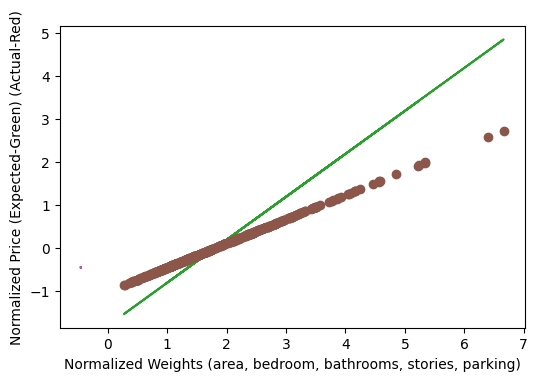

In [180]:
import matplotlib.pyplot as plt 
t_p = modelHousing(x5, x4, x3, x2, x1, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)
t_pm = (0.8315*x5)+(0.9011*x4)+(0.8492*x3)+(0.8507*x2)+(0.5627*x1)+0.5344
#t_pm = (0.8057*x5)+(0.8130*x4)+(0.8077*x3)+(0.8081*x2)+(0.5627*x1)+0.4449
#t_pm = (0.8147*x5)+(0.8157*x4)+(0.8151*x3)+(0.8154*x2)+(0.5843*x1)+0.4105
#t_pm = (0.9584*x5)+(0.9585*x4)+(0.9585*x3)+(0.9585*x2)+(0.8531*x1)+0.0920

fig = plt.figure(dpi = 100)
plt.xlabel("Normalized Weights (area, bedroom, bathrooms, stories, parking)")
plt.ylabel("Normalized Price (Expected-Green) (Actual-Red)")
plt.plot(x5.numpy(), x4.numpy(), x3.numpy(), x2.numpy(), x1.numpy(),
         t_p.detach().numpy())
plt.plot(x5.numpy(), x4.numpy(), x3.numpy(), x2.numpy(), x1.numpy(),
         t_pm.numpy(), 'o')